In [9]:
import pandas_datareader as pdr
import pandas as pd

In [3]:
!pip install pandas --upgrade
!pip install pandas-datareader --upgrade

     |████████████████████████████████| 11.3 MB 8.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


     |████████████████████████████████| 109 kB 7.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
df = pdr.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [7]:
df.to_csv('AAPL.csv')

In [11]:
from google.colab import files
files.download('AAPL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#EXPLORATORY DATA ANALYSIS

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299


In [15]:
df1=df.reset_index()['Close']

In [16]:
df1

0       14.686786
1       14.765714
2       14.929643
3       15.085714
4       15.061786
          ...    
1998    67.692497
1999    67.864998
2000    68.787498
2001    69.964996
2002    70.102501
Name: Close, Length: 2003, dtype: float64

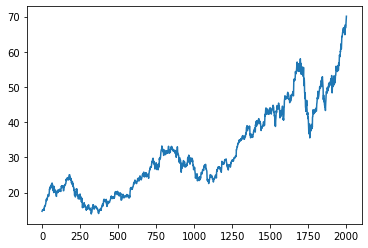

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [21]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(1301, 702)

In [23]:
train_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.37026981],
       [0.37392038],
       [0.37196151]])

##PREPARING THE DATA

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(1200, 100)
(1200,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(601, 100)
(601,)


(None, None)

In [29]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#MODEL GENERATION

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 8s 222ms/step - loss: 0.0090 - val_loss: 0.0356
Epoch 2/100
19/19 [==============================] - 3s 171ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 3/100
19/19 [==============================] - 3s 170ms/step - loss: 4.9929e-04 - val_loss: 0.0025
Epoch 4/100
19/19 [==============================] - 3s 169ms/step - loss: 3.9729e-04 - val_loss: 0.0025
Epoch 5/100
19/19 [==============================] - 3s 171ms/step - loss: 3.8877e-04 - val_loss: 0.0020
Epoch 6/100
19/19 [==============================] - 3s 176ms/step - loss: 3.6296e-04 - val_loss: 0.0018
Epoch 7/100
19/19 [==============================] - 3s 175ms/step - loss: 3.5468e-04 - val_loss: 0.0022
Epoch 8/100
19/19 [==============================] - 3s 170ms/step - loss: 3.3931e-04 - val_loss: 0.0016
Epoch 9/100
19/19 [==============================] - 3s 169ms/step - loss: 3.3435e-04 - val_loss: 0.0014
Epoch 10/100
19/19 [==============================] - 3s 168ms/

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.6.0'

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.22292953172306

In [40]:
math.sqrt(mean_squared_error(ytest,test_predict))

46.85696866616665

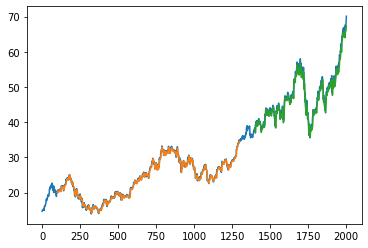

In [41]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

702

In [43]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 361)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.6034191045240285,
 0.6015492881060349,
 0.6039533183772927,
 0.5992787433665248,
 0.605867697904104,
 0.6039088232000436,
 0.6046656488026907,
 0.6108538750187533,
 0.618956480761627,
 0.6162407804549193,
 0.6018608902099163,
 0.5970973248446498,
 0.5987890246905097,
 0.6486955627405266,
 0.674917623632822,
 0.6775888287622804,
 0.6823969572363644,
 0.6736710793541596,
 0.6742943514934907,
 0.6815510733476504,
 0.6755408957721531,
 0.6815065102388327,
 0.6854242596469535,
 0.6876057461003968,
 0.701317801097251,
 0.7202831401353869,
 0.7108449997593524,
 0.7089751154097905,
 0.709019678518608,
 0.7109785532226685,
 0.7139613604560082,
 0.7218858496267482,
 0.7297212805114215,
 0.744323714574239,
 0.753450252846392,
 0.7650253844986206,
 0.7682752986585926,
 0.7616418489437642,
 0.7448579963590718,
 0.736844448902265,
 0.7236221125814257,
 0.7481969688051104,
 0.7358205163729854,
 0.7595939838852053,
 0.7481524056962929,
 0.7216187427001162,
 0.7232214521914775,
 0.7238001612219911,


#PREDICTION

In [48]:
from numpy import array

lst_output=[]
n_steps=360
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.60154929 0.60395332 0.59927874 0.6058677  0.60390882 0.60466565
 0.61085388 0.61895648 0.61624078 0.60186089 0.59709732 0.59878902
 0.64869556 0.67491762 0.67758883 0.68239696 0.67367108 0.67429435
 0.68155107 0.6755409  0.68150651 0.68542426 0.68760575 0.7013178
 0.72028314 0.710845   0.70897512 0.70901968 0.71097855 0.71396136
 0.72188585 0.72972128 0.74432371 0.75345025 0.76502538 0.7682753
 0.76164185 0.744858   0.73684445 0.72362211 0.74819697 0.73582052
 0.75959398 0.74815241 0.72161874 0.72322145 0.72380016 0.73119044
 0.72063931 0.7345739  0.74080669 0.7329267  0.75309409 0.75661118
 0.76337811 0.7723711  0.78479211 0.76662809 0.75015578 0.7478408
 0.76164185 0.71485174 0.70634847 0.74045053 0.7193037  0.74062858
 0.73635473 0.71333809 0.72798502 0.73395063 0.74321072 0.70919773
 0.7301665  0.71458463 0.69650967 0.70122874 0.72598165 0.74094025
 0.67531828 0.64909622 0.65880154 0.68631464 0.67981481 0.6619179
 0.61606266 0.60742584 0.58325172 0.60377527 0.6132134

In [57]:
day_new=np.arange(1,846)
day_pred=np.arange(846,876)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

2003

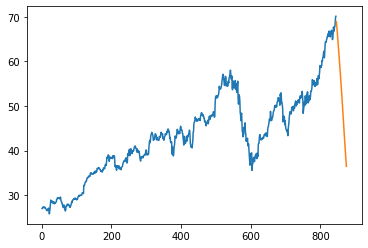

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

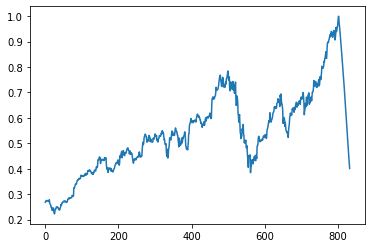

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [60]:
df3=scaler.inverse_transform(df3).tolist()

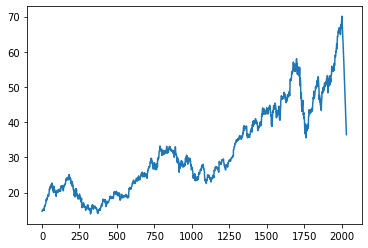

In [61]:
plt.plot(df3)